# Multiple Linear Regression

## Importing the libraries

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [52]:
dataset = pd.read_csv('50_Startups.csv')
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,NaN,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,NaN,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


##Handling missing values

In [53]:
from sklearn.impute import SimpleImputer
imputer_dataset = SimpleImputer(missing_values= np.nan,strategy='mean')
imputer_dataset.fit(dataset.iloc[:,0:3])
dataset.iloc[:,0:3] = imputer_dataset.transform(dataset.iloc[:,0:3])

In [54]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [55]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 202553.47489361707 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 123111.12489361703 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 123111.12489361703 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 202553.47489361707 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 12

In [56]:
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


## Encoding categorical data

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [58]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 202553.47489361707]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 123111.12489361703 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 123111.12489361703 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 202553.47489361707]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [60]:
X_train

array([[0.0, 1.0, 0.0, 55493.95, 103057.49, 214634.81],
       [0.0, 0.0, 1.0, 46014.02, 85047.44, 205517.64],
       [0.0, 1.0, 0.0, 75328.87, 144135.98, 134050.07],
       [1.0, 0.0, 0.0, 46426.07, 157693.92, 210797.67],
       [0.0, 1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 1000.23, 124153.04, 1903.93],
       [0.0, 0.0, 1.0, 542.05, 123111.12489361703, 0.0],
       [0.0, 0.0, 1.0, 73887.25102040816, 153032.06, 107138.38],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 1.0, 0.0, 61994.48, 115641.28, 91131.24],
       [1.0, 0.0, 0.0, 63408.86, 129219.61, 46085.25],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [1.0, 0.0, 0.0, 23640.93, 96189.63, 148001.11],
       [1.0, 0.0, 0.0, 76253.86, 113867.3, 298664.47],
       [0.0, 0.0, 1.0, 15505.73, 127382.3, 35534.17],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 

In [61]:
X_test

array([[0.0, 1.0, 0.0, 66051.52, 182645.56, 118148.2],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 101913.08, 123111.12489361703, 229160.95],
       [0.0, 1.0, 0.0, 27892.92, 84710.77, 164470.71],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 72107.6, 127864.55, 353183.81],
       [0.0, 0.0, 1.0, 20229.59, 65947.93, 185265.1],
       [0.0, 0.0, 1.0, 61136.38, 152701.92, 88218.23],
       [0.0, 1.0, 0.0, 73994.56, 122782.75, 303319.26],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

In [62]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [63]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

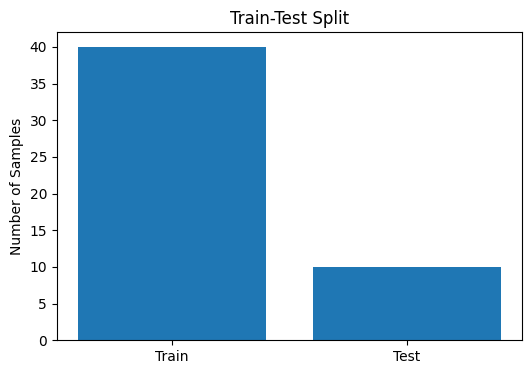

In [64]:
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Test'], [len(X_train), len(X_test)])
plt.title('Train-Test Split')
plt.ylabel('Number of Samples')
plt.show()

## Training the Multiple Linear Regression model on the Training set

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [66]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=0),
    'XGBoost': XGBRegressor(random_state=0)
}

In [67]:
## Training and Evaluating Models
trained_models = {}
model_scores = {}

for model_name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)
    trained_models[model_name] = model

    # Predicting the Test set results
    y_pred = model.predict(X_test)

    # R2 Score
    r2 = r2_score(y_test, y_pred)
    model_scores[model_name] = r2

    print(f"{model_name} - R2 Score: {r2:.4f}")
    print()


Linear Regression - R2 Score: 0.9506

Decision Tree - R2 Score: 0.9118

XGBoost - R2 Score: 0.9446



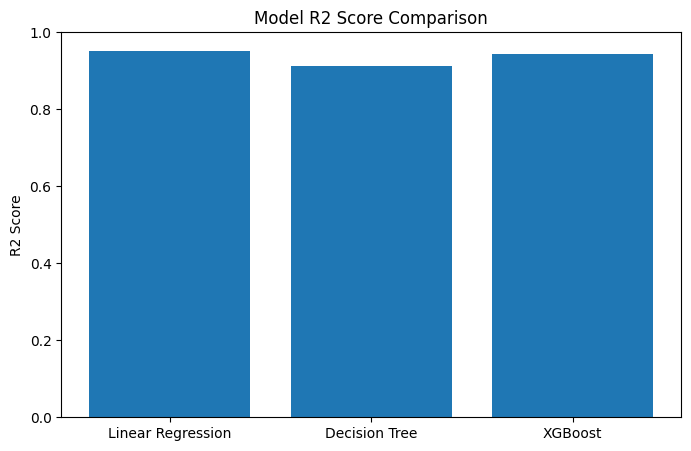

In [69]:
## Plotting Model Comparison
plt.figure(figsize=(8, 5))
plt.bar(model_scores.keys(), model_scores.values())
plt.title('Model R2 Score Comparison')
plt.ylabel('R2 Score')
plt.ylim(0, 1)
plt.show()

In [71]:
new_data = [[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1]]

# Using Linear Regression for prediction
prediction = trained_models['Linear Regression'].predict(new_data)
print(f"Predicted Profit: ${prediction[0]:.2f}")


Predicted Profit: $192803.57
